In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification

# Limpieza y preparacion de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Mobile-price-classification.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print(df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# Funciones

In [ ]:
# Grafica de mapa de calor
def tabContigencia(columnA, columnB, style):
  cross = pd.crosstab(columnA, columnB)
  if(style == '%'):
    heat = sns.heatmap(cross*100/cross.values.sum(), cmap = 'rocket_r', fmt = 'g', annot = True, linewidths= 0.5)
    heat.set_title('Mapa de calor (%)', fontsize = 16)
  else:
    heat = sns.heatmap(cross, cmap = 'rocket_r', fmt = 'g', annot = True, linewidths= 0.5)
    heat.set_title('Mapa de calor', fontsize = 16)

In [ ]:
# Grafica de violin y diagrama de cajas
def viobox(data,numeric,category, style):
  byId = data.groupby(level = 0)[numeric].mean().to_frame()
  cat = data.groupby(level = 0)[category].last()
  merged = byId.merge(cat, left_index= True, right_index= True)
  if(style == 'box'):
    ax = sns.boxplot(data=merged, x=category, y=numeric)
    ax.set_title('Diagrama de cajas', fontsize = 14)
  elif(style == 'vio'):
    ax = sns.violinplot(data = merged, x = category, y = numeric)
    ax.set_title('Diagrama de violines', fontsize = 14)

In [ ]:
# Grafica de barras horizontales
def barras(column, style):
  counts = column.value_counts()
  if(style == '%'):
    bar  = sns.barplot(y = counts.index, x = (counts*100)/counts.sum(), orient = 'h', palette= 'rocket')
    plt.xlabel('Porcentaje', fontsize = 16)
    for p in bar.patches:
      width = p.get_width()    # get bar length
      bar.text(width,       # set the text at 1 unit right of the bar
              p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
              '{:1.2f}%'.format(width), # set variable to display, 2 decimals
              ha = 'left',   # horizontal alignment
              va = 'center')  # vertical alignment 
  else:
    bar  = sns.barplot(y = counts.index, x = counts, orient = 'h', palette = 'rocket')
    plt.xlabel(xlabel = 'count', fontsize = 16)
    for p in bar.patches:
      width = p.get_width()    # get bar length
      bar.text(width,       # set the text at 1 unit right of the bar
              p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
              '{:1}'.format(width), # set variable to display, 2 decimals
              ha = 'left',   # horizontal alignment
              va = 'center')  # vertical alignment
  bar.set_title('Grafica de barras', fontsize = 18)

In [ ]:
# Histograma y boxplot
def graficas(column, style):
  fig, axs = plt.subplots(2, figsize=(6,5))

  fig.suptitle("Diagrama de caja e histograma", fontsize = 14)
  box = sns.boxplot(x = column, ax = axs[0])
  box.set(xlabel = None)
  hist = sns.histplot(x = column, ax = axs[1], stat = style)
  hist.set_ylabel(style)

# Análisis descriptivo

## Variables categóricas por precio



*   Bluetooth - uniforme
*   Dual sim*
*   4G *
*   3G - muchos 3G
*   Touch Screen *
*   Wifi *
*   Number of core procesors *


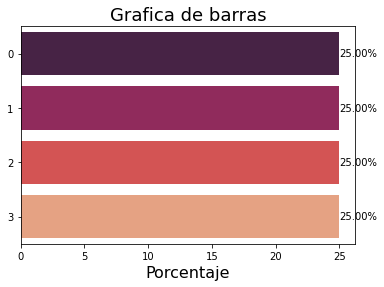

In [ ]:
barras(df["price_range"], "%")

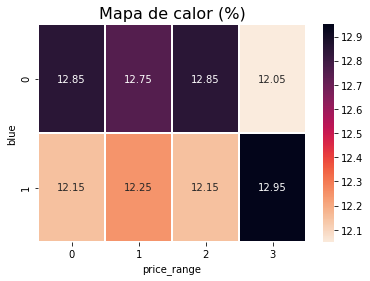

In [ ]:
tabContigencia(df['blue'],  df['price_range'], '%')

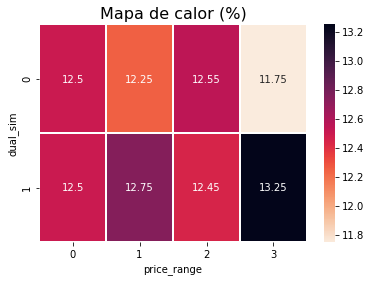

In [ ]:
tabContigencia(df['dual_sim'], df['price_range'], '%')

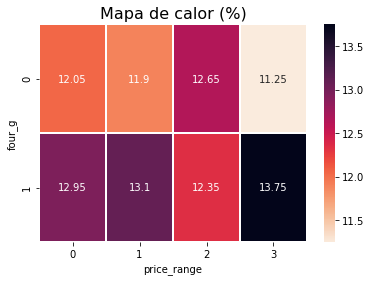

In [ ]:
tabContigencia(df['four_g'], df['price_range'], '%')

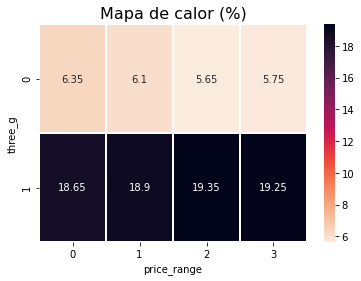

In [ ]:
tabContigencia(df['three_g'], df['price_range'], '%')

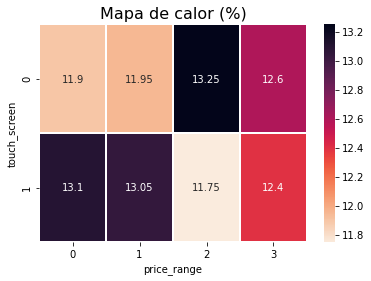

In [ ]:
tabContigencia(df['touch_screen'], df['price_range'], '%')

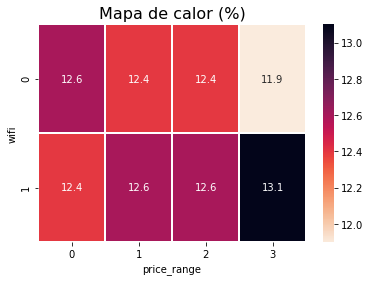

In [ ]:
tabContigencia(df['wifi'], df['price_range'], '%')

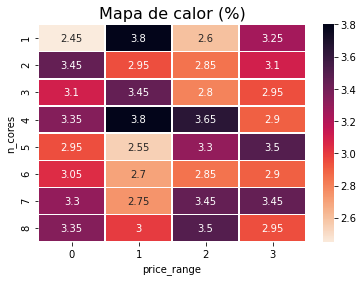

In [ ]:
tabContigencia(df['n_cores'], df['price_range'], '%')

## Variables numericas por precio



*   Battery power ^ price ^ **
*   Clock speed 
*   Front camera in mega pixels 
*   Internal memory in gigabytes 
*   Mobile depth in cm ^ price ^ (1,3)
*   Mobile weigth v price ^ (3)
*   Primary camera in mega pixels
*   Pixel resolution height ^ price ^ *
*   Pixel resolution width ^ price ^ *
*   RAM in megabytes ^ price ^ **
*   Screen height
*   Screen width ^ price ^ (3)
*   Talk time



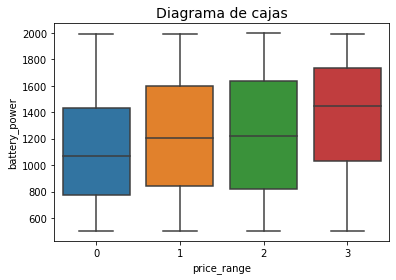

In [ ]:
viobox(df, 'battery_power', 'price_range', 'box')

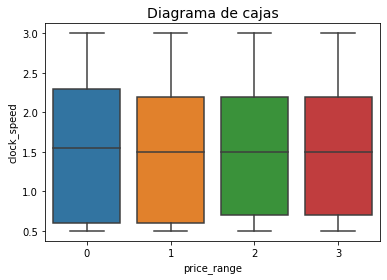

In [ ]:
viobox(df, 'clock_speed', 'price_range', 'box')

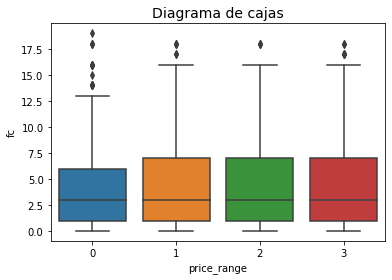

In [ ]:
viobox(df,'fc', 'price_range', 'box')

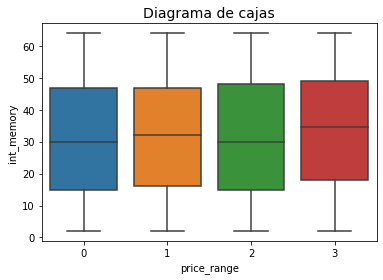

In [ ]:
viobox(df,'int_memory', 'price_range', 'box')

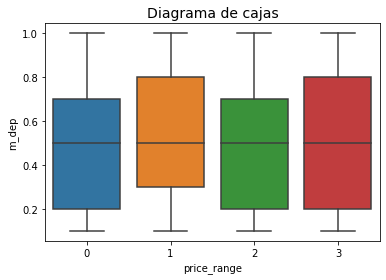

In [ ]:
viobox(df,'m_dep', 'price_range', 'box')

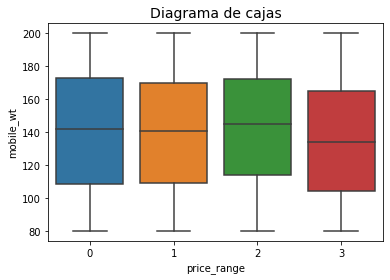

In [ ]:
viobox(df,'mobile_wt', 'price_range', 'box')

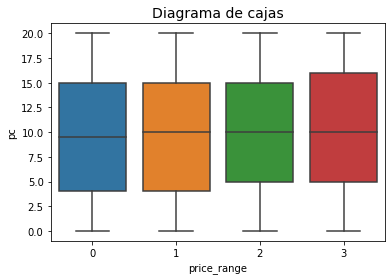

In [ ]:
viobox(df, 'pc', 'price_range', 'box')

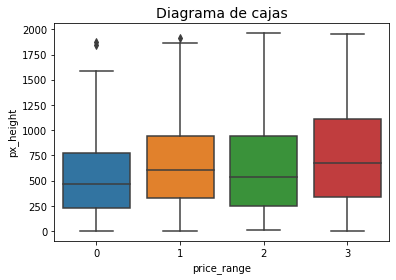

In [ ]:
viobox(df, 'px_height', 'price_range', 'box')

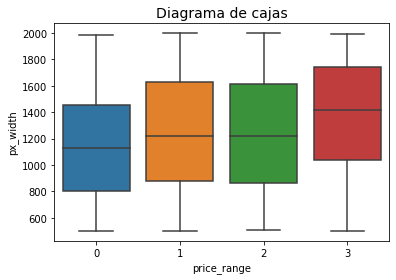

In [ ]:
viobox(df, 'px_width', 'price_range', 'box')

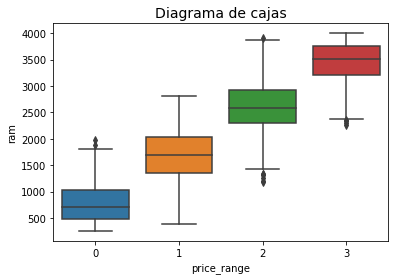

In [ ]:
viobox(df, 'ram', 'price_range', 'box')

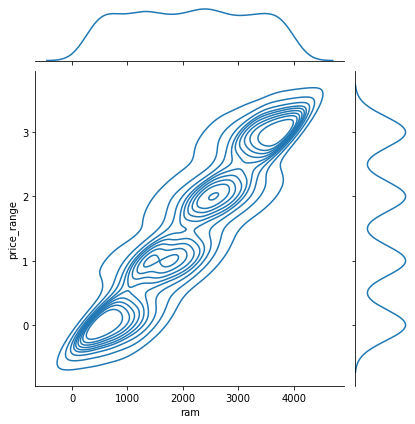

In [ ]:
sns.jointplot(x='ram',y='price_range',data=df,kind='kde');

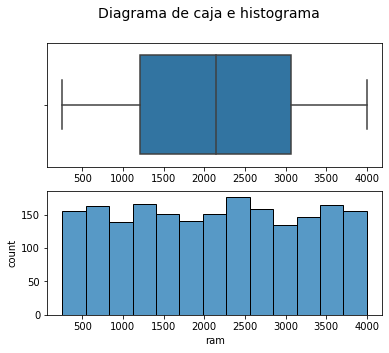

In [ ]:
graficas(df["ram"], "count")

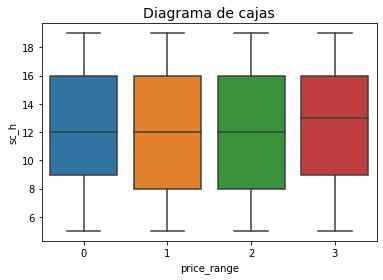

In [ ]:
viobox(df,'sc_h', 'price_range', 'box')

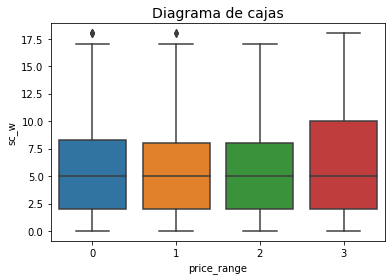

In [ ]:
viobox(df,'sc_w', 'price_range', 'box')

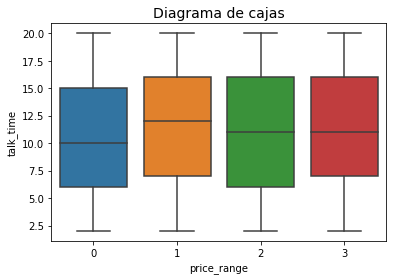

In [ ]:
viobox(df, 'talk_time', 'price_range', 'box')

## Correlacion entre variables numericas

In [ ]:
numeric = df.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores'])

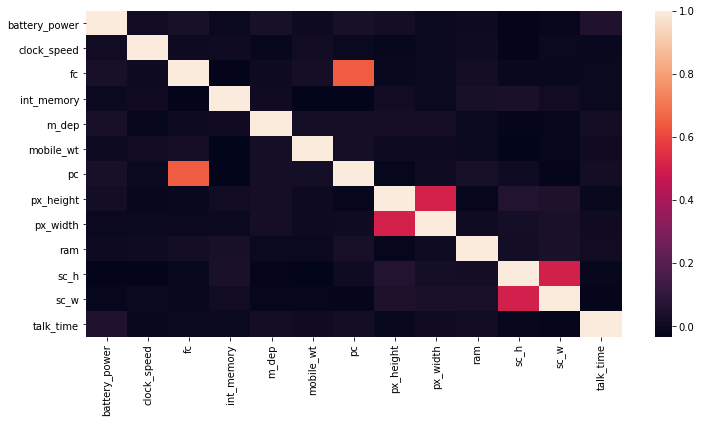

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(numeric.corr())
plt.show()

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_auc_score,plot_confusion_matrix
from sklearn.cluster import KMeans

In [ ]:
X = df.drop(columns=['price_range'])
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1400, 20)
(600, 20)


In [ ]:
def reporte(test, pred):
  return pd.DataFrame(classification_report(test, pred, output_dict = True))

def reporte2(test, pred):
  resultado = confusion_matrix(test, pred)
  acc = np.trace(resultado)/np.sum(resultado)
  print(f'Verdaderos positivos: {acc}\n')
  print(f'Matriz de confusion:\n{resultado}')


*   Precision = TP/(TP + FP)
*   Recall: Fraction of positives that were correctly identified TP/(TP+FN)
*   F1 Score = 2*(Recall * Precision) / (Recall + Precision)


## Naive Bayes

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, Y_train) 
Y_pred_nb = NaiveBayes.predict(X_test)

In [ ]:
reporte(Y_test, Y_pred_nb)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.921986,0.691824,0.699346,0.877551,0.793333,0.797677,0.795980
recall,0.855263,0.709677,0.708609,0.908451,0.793333,0.795500,0.793333
f1-score,0.887372,0.700637,0.703947,0.892734,0.793333,0.796172,0.794239
support,152.000000,155.000000,151.000000,142.000000,0.793333,600.000000,600.000000


In [ ]:
reporte2(Y_test, Y_pred_nb)

Verdaderos positivos: 0.7933333333333333

Matriz de confusion:
[[130  22   0   0]
 [ 11 110  34   0]
 [  0  26 107  18]
 [  0   1  12 129]]


## Random forest



In [ ]:
rForest = RandomForestClassifier()

rForest.fit(X_train, Y_train)

Y_pred_rf = rForest.predict(X_test)

In [ ]:
reporte(Y_test, Y_pred_rf)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.934641,0.816993,0.821429,0.889610,0.866667,0.865668,0.865100
recall,0.940789,0.806452,0.761589,0.964789,0.866667,0.868405,0.866667
f1-score,0.937705,0.811688,0.790378,0.925676,0.866667,0.866362,0.865226
support,152.000000,155.000000,151.000000,142.000000,0.866667,600.000000,600.000000


In [ ]:
reporte2(Y_test, Y_pred_rf)

Verdaderos positivos: 0.8666666666666667

Matriz de confusion:
[[143   9   0   0]
 [ 10 125  20   0]
 [  0  19 115  17]
 [  0   0   5 137]]


## Neuronal network

In [ ]:
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(X_train, Y_train)
Y_pred_nn = NeuralNetwork.predict(X_test)

In [ ]:
reporte(Y_test, Y_pred_nn)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.838710,0.648438,0.568807,0.639423,0.68,0.673844,0.674466
recall,0.855263,0.535484,0.410596,0.936620,0.68,0.684491,0.680000
f1-score,0.846906,0.586572,0.476923,0.760000,0.68,0.667600,0.665973
support,152.000000,155.000000,151.000000,142.000000,0.68,600.000000,600.000000


In [ ]:
reporte2(Y_test, Y_pred_nn)

Verdaderos positivos: 0.68

Matriz de confusion:
[[130  22   0   0]
 [ 25  83  38   9]
 [  0  23  62  66]
 [  0   0   9 133]]


## SVC

In [ ]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(X_train, Y_train) 
Y_pred_svc = SupportVectorMachine.predict(X_test)

In [ ]:
reporte(Y_test, Y_pred_svc)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.954839,0.930380,0.970149,0.908497,0.94,0.940966,0.941406
recall,0.973684,0.948387,0.860927,0.978873,0.94,0.940468,0.940000
f1-score,0.964169,0.939297,0.912281,0.942373,0.94,0.939530,0.939527
support,152.000000,155.000000,151.000000,142.000000,0.94,600.000000,600.000000


In [ ]:
reporte(Y_test, Y_pred_svc)

Verdaderos positivos: 0.94

Matriz de confusion:
[[148   4   0   0]
 [  7 147   1   0]
 [  0   7 130  14]
 [  0   0   3 139]]


## K means

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_train)

In [ ]:
clasificacion = kmeans.predict(X_test)

In [ ]:
reporte(Y_test, clasificacion)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.773196,0.458904,0.218935,0.087912,0.436667,0.384737,0.395589
recall,0.961538,0.418750,0.264286,0.055556,0.436667,0.425032,0.436667
f1-score,0.857143,0.437908,0.239482,0.068085,0.436667,0.400655,0.411852
support,156.000000,160.000000,140.000000,144.000000,0.436667,600.000000,600.000000


In [ ]:
reporte2(Y_test, clasificacion)

Verdaderos positivos: 0.43666666666666665

Matriz de confusion:
[[150   5   0   1]
 [ 44  67   0  49]
 [  0  70  37  33]
 [  0   4 132   8]]


## Matrices de confusion

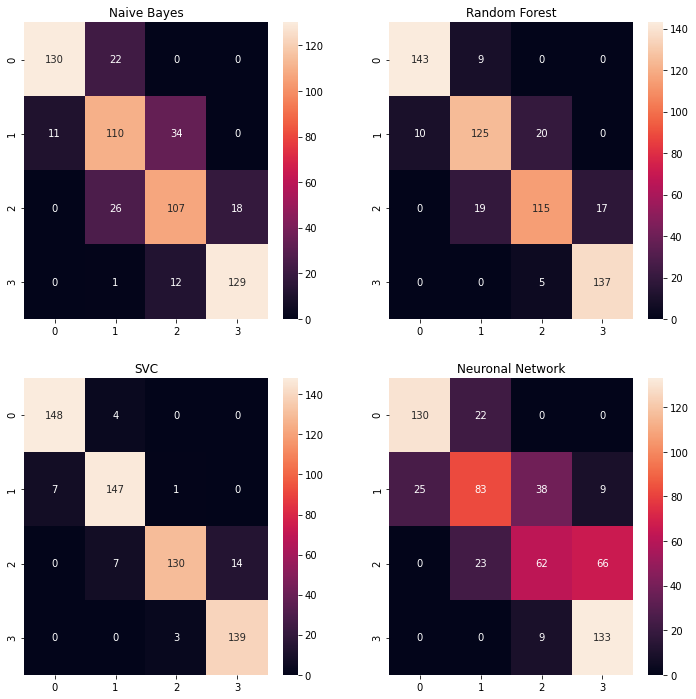

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.heatmap(data=confusion_matrix(Y_test, Y_pred_nb), annot=True, fmt='g', ax=axes[0,0])
sns.heatmap(data=confusion_matrix(Y_test, Y_pred_rf), annot=True, fmt='g', ax=axes[0,1])
sns.heatmap(data=confusion_matrix(Y_test, Y_pred_svc), annot=True, fmt='g', ax=axes[1,0])
sns.heatmap(data=confusion_matrix(Y_test, Y_pred_nn), annot=True, fmt='g', ax=axes[1,1])

axes[0][0].set_title('Naive Bayes')
axes[0][1].set_title('Random Forest')
axes[1][0].set_title('SVC')
axes[1][1].set_title('Neuronal Network');